# PCA - Plot variance along each principal component

This is an attempt to visualize how much variance each principal component has along its axis. The builtin datasets are used for this purpose. The plots will easily tell which principle compenents to keep and which to remove for dimensionality reduction. 

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.datasets as dataset
import matplotlib.pyplot as plt
import numpy as np

Define functions for each operations so that the code can be reusable for different datasets.

In [16]:
def get_scale_data(data):
    sc = StandardScaler()
    data_std = sc.fit_transform(data)
    
    return data_std

In [17]:
def get_cov_matrix(data):
    return np.cov(data.T)

In [18]:
def get_eigen_val_and_vec(data):
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    
    return (eigen_vals, eigen_vecs)

In [19]:
def get_tot_var(data):
    tot_var = np.sum(eigen_vals)
    
    return tot_var

In [20]:
def get_exp_var(data):
    exp_var = [(i/tot_var) for i in sorted(eigen_vals, reverse=True)]

    return exp_var

In [21]:
def get_cum_sum(data):
    return np.cumsum(exp_var)

In [43]:
def plot_pc_against_exp_var(title, exp_var, cum_exp_var):
    r = range(1, 14)
    height = exp_var
    alpha = 0.9
    align = 'center'
    plt.figure(figsize=(20,10))
    plt.bar(r, height=height, alpha=alpha, align=align, label='individual explained variance')
    plt.step(r, cum_exp_var, where='mid', label='cumulative explained variance')
    
    plt.title(title)
    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio')
    plt.legend(loc='best')
    
    plt.savefig(f'{title}.png')
    
    plt.show()

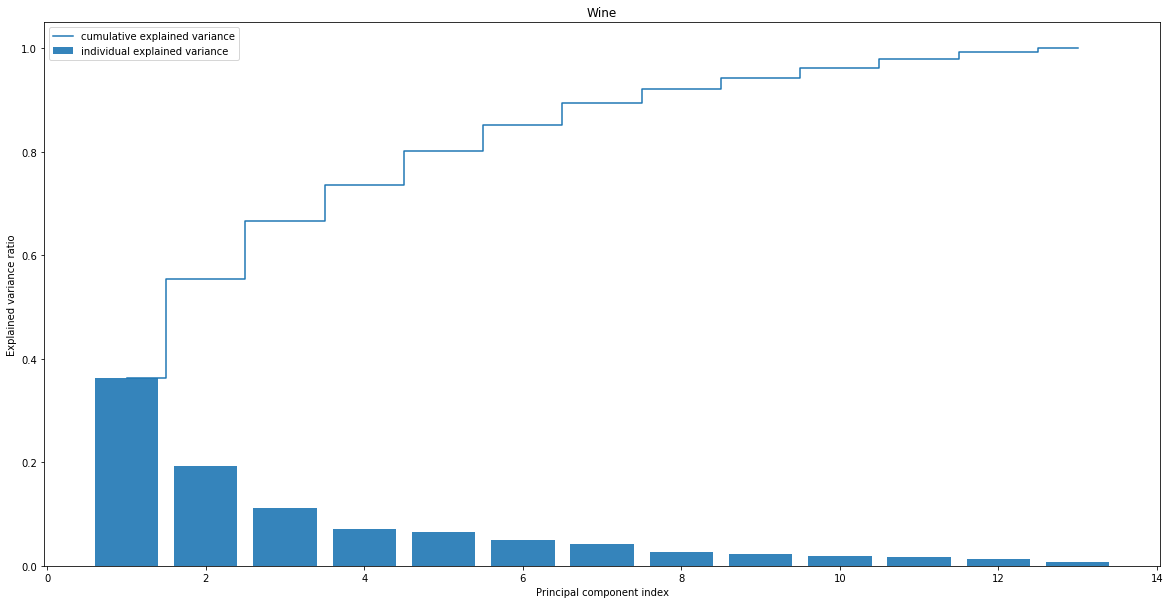

In [44]:
data = dataset.load_wine().data
data_std = get_scale_data(data)
cov_mat = get_cov_matrix(data_std)
eigen_vals, eigen_vecs = get_eigen_val_and_vec(cov_mat)
tot_var = get_tot_var(eigen_vals)
exp_var = get_exp_var(eigen_vals)
cum_exp_var = get_cum_sum(exp_var)
plot_pc_against_exp_var('Wine', exp_var, cum_exp_var)

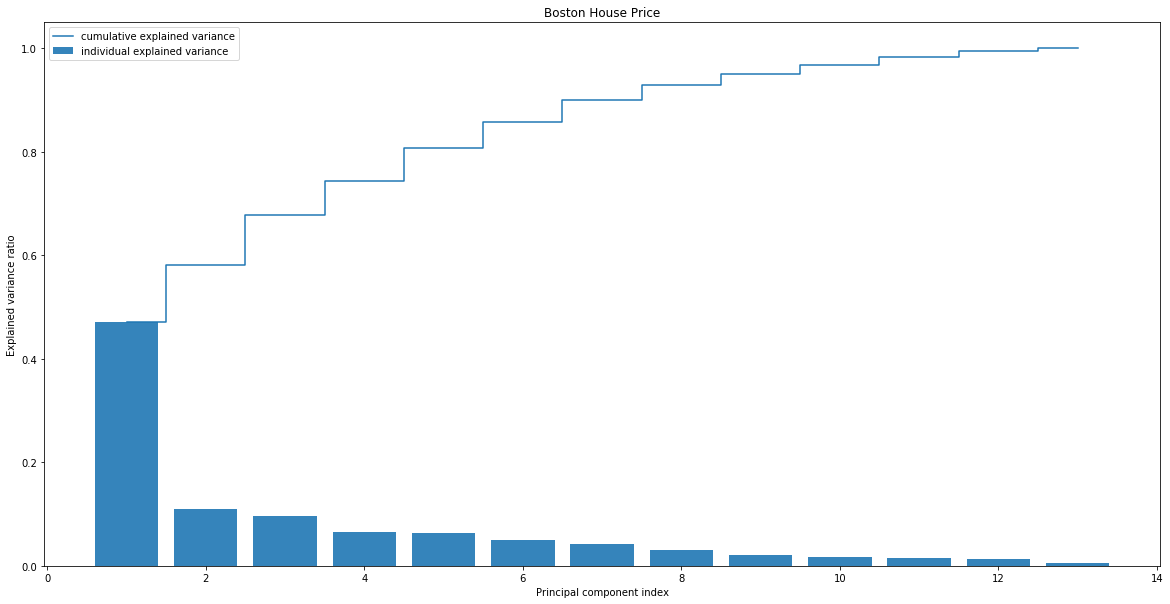

In [45]:
data = dataset.load_boston().data
data_std = get_scale_data(data)
cov_mat = get_cov_matrix(data_std)
eigen_vals, eigen_vecs = get_eigen_val_and_vec(cov_mat)
tot_var = get_tot_var(eigen_vals)
exp_var = get_exp_var(eigen_vals)
cum_exp_var = get_cum_sum(exp_var)
plot_pc_against_exp_var('Boston House Price', exp_var, cum_exp_var)

### References
https://sebastianraschka.com/books.html#python-machine-learning-2nd-edition